# Exploratory Data Analysis
Before we started building models to conduct sentiment analysis on our reviews data, we would like to perform preliminary analysis to ensure later on analysis more smoothly.\ 

Our preliminary analysis includes: 
1. Visualizing data to understand our Review data in a whole 

    *Note: To make the file more precise, we put the first four in less related part in the appendix in conclusion page*
    1. Overall Statistics
    2. Platform Wise Analysis
    3. Attraction Wise Anaysis
    4. Date Wise Analysis
    5. Rating Wise Analysis


2. Natural Language Processing on Reviews
    1. Language Detection
    2. Contractions Expanding
    3. Punctuation & Numbers Removals
    4. Stop Words Removals
    5. Lemmatization
    6. Frequency

Based on our exploratory data analysis, we would be able to know which words are used the most in every reviews.

## Load in Data

In [20]:
# Import Python Libraries

#Data Analysis 
import numpy as np
import pandas as pd
from datetime import datetime

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Plotly Libraris
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot

#Warnings
import warnings
warnings.filterwarnings('ignore')

## Understanding Data

In [21]:
review_all = pd.read_csv('../data/all_reviews.csv')
review_all.head(5)

,platform,attraction,review,rating,datecolumn,coordinates
0,TripAdvisor,Alcatraz Island,My family took the tour ( BUY TICKETS IN ADVAN...,5.0,"Mar, 2023",NaN
1,TripAdvisor,Alcatraz Island,This is a must stop if you are in San Fran!!! ...,5.0,"Feb, 2023",NaN
2,TripAdvisor,Alcatraz Island,I did not expect to enjoy the tour as much as ...,5.0,"Mar, 2023",NaN
3,TripAdvisor,Alcatraz Island,San Francisco is completely unsafe. We bought ...,1.0,"Mar, 2023",NaN
4,TripAdvisor,Alcatraz Island,I had a 13-hour layover in San Francisco And I...,4.0,"Mar, 2023",NaN


This dataset contains information about reviews and its corresponding platform and attraction. We leave the datecolumn and coordinate for now.
- **platform** - where's the review coming from
- **attraction** - what attraction did the user leave the review
- **review** - user's opinion on certain attraction
- **rating** - user's rating for the certain attraction
- **datecolumn** - the date when user went to the attraction
- **coordinate** - the latitude and longtitude for the location

There are 3 different plateforms, 84 atrractions and 9.87K reviews in our dataset. Based on our analysis, 74% of reviews are from tripadvisor and yelp has more attraction related to small businesses in San Francisco rather attractions.

### Rating Wise Analysis
To understand our rating variable, we first analyzed its six important values and use box-plot to visualize the result. Secondly, we created another side-by-side box plot for ratings in different platforms to compare the users behavior on rating. 

In [33]:
# Analyze the 6 values in rating
review_all.describe()['rating']

count    9228.000000
mean        4.426094
std         0.957343
min         1.000000
25%         4.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: rating, dtype: float64

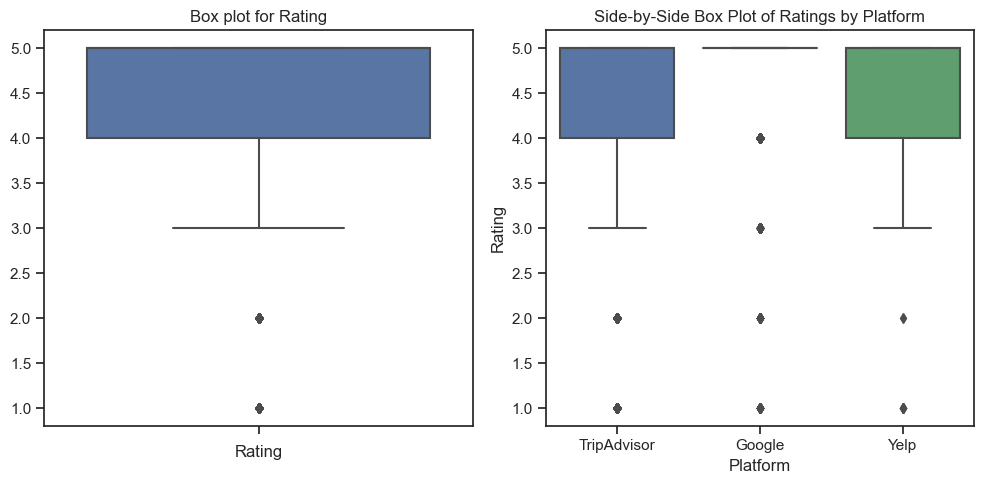

In [67]:
# Create a subplot with 1 row and 2 columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Create horizontal box plot for rating
sns.boxplot(data=review_all, y='rating', orient='h', ax=axes[0])
axes[0].set_title('Box plot for Rating')
axes[0].set_xlabel('Rating')
axes[0].set_ylabel('')

# Create side-by-side box plot for ratings
sns.boxplot(x='platform', y='rating', data=review_all, ax=axes[1])
axes[1].set_title('Side-by-Side Box Plot of Ratings by Platform')
axes[1].set_xlabel('Platform')
axes[1].set_ylabel('Rating')

# Adjust the layout and spacing
fig.tight_layout()

# Show the plot
plt.show()


In all three platforms, the users can rate from 1 to 5. The above results and plot show that the mean value of the rating 4.42 while the median is 5. It might because that those attractions and places are recommended by three platforms, and naturally most of them are high-rated.

In [36]:
review_all = review_all.drop(['datecolumn'], axis=1)
review_all.head(5)

,platform,attraction,review,rating,coordinates,month,year
0,TripAdvisor,Alcatraz Island,My family took the tour ( BUY TICKETS IN ADVAN...,5.0,NaN,3.0,2023.0
1,TripAdvisor,Alcatraz Island,This is a must stop if you are in San Fran!!! ...,5.0,NaN,2.0,2023.0
2,TripAdvisor,Alcatraz Island,I did not expect to enjoy the tour as much as ...,5.0,NaN,3.0,2023.0
3,TripAdvisor,Alcatraz Island,San Francisco is completely unsafe. We bought ...,1.0,NaN,3.0,2023.0
4,TripAdvisor,Alcatraz Island,I had a 13-hour layover in San Francisco And I...,4.0,NaN,3.0,2023.0


## NLP on Reviews

### Language Detection
First, we use **fasttext** package to run a pretrained language identifier model and see how many reviews are left by users using different languages.

In [38]:
review_all = pd.read_csv('../data/review_all_temp.csv')

In [39]:
# Import packages

# NLTK
import nltk
nltk.download('punkt')
nltk.download('omw-1.4')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer

# String editing
import string
import contractions
import re
from wordcloud import WordCloud
#import fasttext

[nltk_data] Downloading package punkt to /Users/alliewu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/alliewu/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Load the language identifier provided by fasttext. Since it can only identify one sentence at a time, we used sentence tokenizer on each review and identify based on first sentence.

In [ ]:
# Load the pretrained fasttext model
model = fasttext.load_model('../fasttext/lid.176.bin')

# Tokenize as sentence and detect the language
langs = []
for text in review_all['review']:
    sent = nltk.sent_tokenize(text)
    #print(sent[0])
    try:
      lang = model.predict(sent[0])
      langs.append(str(lang)[12:14])
    except:
      langs.append('en') 
    #print(lang)
review_all['language'] = langs

We then created an **english** column to see how many reviews are used in English and how many are not.

In [41]:
# create an english column
get_eng = lambda x: 'en' if x == 'en' else 'non-en'
review_all['en'] = review_all['language'].apply(get_eng)

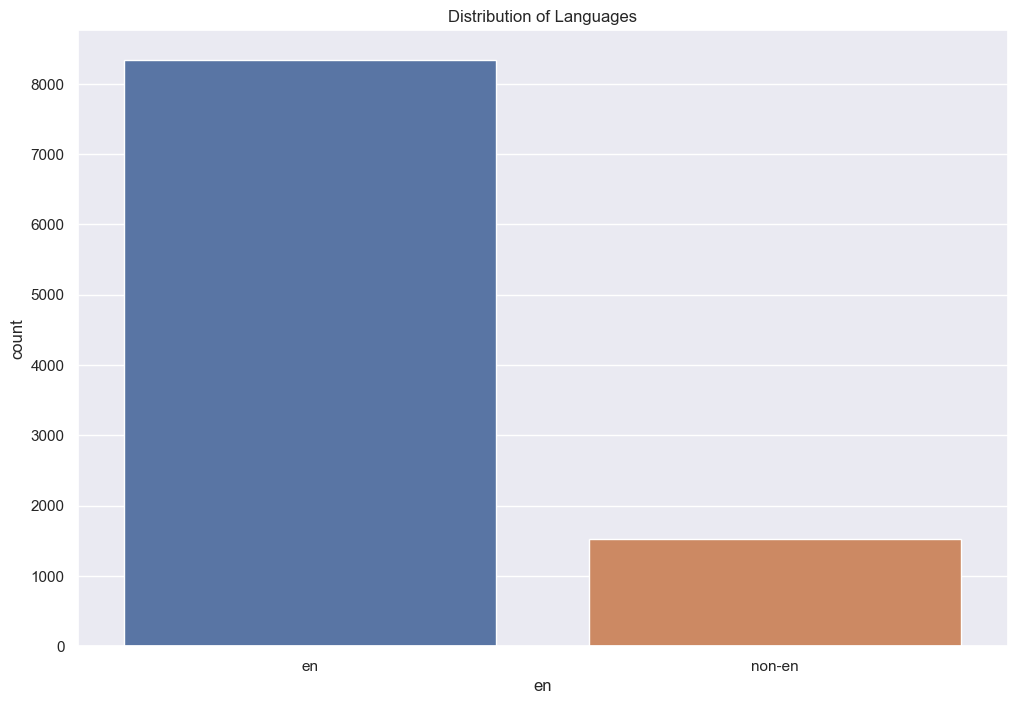

In [42]:
# create bar plot for # of english or non english reviews
sns.set(rc={'figure.figsize':(12,8)})
sns.countplot(x='en', data=review_all)
plt.title('Distribution of Languages')
plt.show()

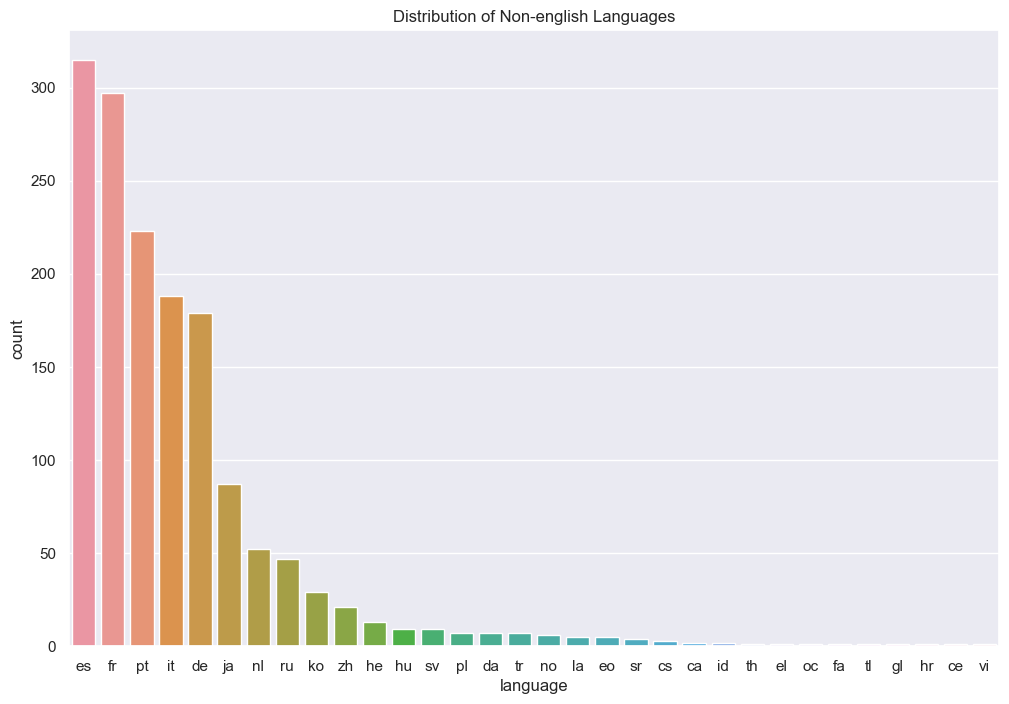

In [43]:
# create bar plot for # of non english reviews
sns.countplot(x='language',
            data=review_all.loc[review_all['language']!='en'], 
            order = review_all.loc[review_all['language']!='en']['language'].value_counts().index[::1])
plt.title('Distribution of Non-english Languages')
sns.set(rc={'figure.figsize':(12,8)})
plt.show()

The above two plots show the proportion of english reviews and non english reviews are 4:1. In the non english subset, lots of them are used in Spanish, French and Protuguese. The language code are writing in ISO 639-1 form, please refer: https://en.wikipedia.org/wiki/ISO_639-1

### Contraction Expanding
Before actually using the review, we firstly expand contraction from the review.\
One example coule be: it's -> it

In [44]:
# copy original review data
review_nlp = review_all.copy()

In [45]:
# define a function to expand contractions
def remove_contractions(data):
    words = []
    for word in data.split():
        words.append(contractions.fix(word))
    return words

# apply the above function on review column
review_nlp['no_contract'] = review_nlp['review'].apply(remove_contractions)

# add the seperated item back to one item
review_nlp['no_contract'] = [' '.join(map(str, l)) for l in review_nlp['no_contract']]

# print one example result
print(review_nlp['no_contract'][50])

This place is a must to visit when you are in San Francisco, book well in advance, we done the tour at night. It is a very eerie, the place smells of fear, it has a ghostly feel about it The tour is really good you can go at your own pace as you have audio sound. Do not miss the talks about prisoners escaping, be aware there is a lot of walking and it can be very cold, take photos especially from the boat as you travel to the island, there are great views of the Golden Gate Bridge.


### Punctuation and Number Removals
Punctuation refers to the use of specific symbols in writing, such as periods, commas, and question marks, to clarify meaning and indicate pauses or intonation.
We removed puntuation and number from the string, so it would leave us only words The punctuation we used are provided from the string package

In [46]:
# define punctuation
punc = string.punctuation
print(punc)

# remove punctuation on each review and make it a new column
review_nlp['no_punc'] = [word.translate(str.maketrans('', '', punc)) for word in review_nlp['no_contract']]
print(review_nlp['no_punc'][1])

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
This is a must stop if you are in San Fran We did the audio tour and was very interesting We were going to do ther night tour but did not book far enough in advance Should book night tour a week in advance


In [47]:
# remove numbers and make a new column
review_nlp['no_numbers'] = review_nlp['no_punc'].apply(lambda x: re.sub(r'\d+', '', x))
print(review_nlp['no_numbers'][30])

We enjoyed our visit to Alcatraz We liked the idea of taking the ferry over and being able to spend as much time as we needed to see the facility in its entireness The staff was very informative with the history of AlcatrazWe know it is touristy area but one should take the opportunity and educate oneself to the system and what went on


### Stopwords Removals
A stopword is a commonly used word in a language that is filtered out during text processing to improve the performance of natural language processing tasks. We also remove stopwords from our reviews to standardize each review and we could actually find meaningful insights.

In [48]:
# define stop words
stop_words = stopwords.words('english')
print(f'Stop Words: {stop_words}')

Stop Words: ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so

In [49]:
# remove stopwords and make it into a new column
review_nlp['no_stopword'] = review_nlp['no_numbers'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))
print(review_nlp['no_stopword'][0])

family took tour BUY TICKETS ADVANCE small boys infant difficult maneuver stroller made trek children ferry clean peaceful snack purchase purchased hotdogs drinks advance boat bathroom clean appropriate needs island also clean appropriate facilities steep hills active family struggle audio tour appropriate children enjoyed well educational also lifelong memory made family recommend


### Lemmatization
Lemmatization is the process of reducing a word to its base or dictionary form, known as the lemma.\
We did it to ensure pural or single values, verbs in different tense would not affect our result.

In [50]:
# Create a WordNetLemmatizer object
lemmatizer = WordNetLemmatizer()

# Define a function to lemmatize a sentence
def lemmatize_sentence(string):
    words = nltk.word_tokenize(string)
    lemmatized_words = [lemmatizer.lemmatize(word.lower()) for word in words]
    return ' '.join(lemmatized_words)

# Create new column
review_nlp['lemmatized'] = review_nlp['no_stopword'].apply(lemmatize_sentence)
print(review_nlp['lemmatized'][0])

family took tour buy ticket advance small boy infant difficult maneuver stroller made trek child ferry clean peaceful snack purchase purchased hotdog drink advance boat bathroom clean appropriate need island also clean appropriate facility steep hill active family struggle audio tour appropriate child enjoyed well educational also lifelong memory made family recommend


The result does not look like all the words are perfectly lemmatized and it because there are certain cases where the WordNetLemmatizer might not produce the expected lemma. For example, it might not always convert a verb in past tense to its base form in present tense. This is because the WordNetLemmatizer is not a complete morphological analyzer.

In [51]:
# show the first five result
review_nlp.head(5)

,platform,attraction,review,rating,coordinates,month,year,language,en,no_contract,no_punc,no_numbers,no_stopword,lemmatized
0,TripAdvisor,Alcatraz Island,My family took the tour ( BUY TICKETS IN ADVAN...,5.0,NaN,3.0,2023.0,en,en,My family took the tour ( BUY TICKETS IN ADVAN...,My family took the tour BUY TICKETS IN ADVANC...,My family took the tour BUY TICKETS IN ADVANC...,family took tour BUY TICKETS ADVANCE small boy...,family took tour buy ticket advance small boy ...
1,TripAdvisor,Alcatraz Island,This is a must stop if you are in San Fran!!! ...,5.0,NaN,2.0,2023.0,en,en,This is a must stop if you are in San Fran!!! ...,This is a must stop if you are in San Fran We ...,This is a must stop if you are in San Fran We ...,must stop San Fran audio tour interesting goin...,must stop san fran audio tour interesting goin...
2,TripAdvisor,Alcatraz Island,I did not expect to enjoy the tour as much as ...,5.0,NaN,3.0,2023.0,en,en,I did not expect to enjoy the tour as much as ...,I did not expect to enjoy the tour as much as ...,I did not expect to enjoy the tour as much as ...,expect enjoy tour much recorded tour informati...,expect enjoy tour much recorded tour informati...
3,TripAdvisor,Alcatraz Island,San Francisco is completely unsafe. We bought ...,1.0,NaN,3.0,2023.0,en,en,San Francisco is completely unsafe. We bought ...,San Francisco is completely unsafe We bought t...,San Francisco is completely unsafe We bought t...,San Francisco completely unsafe bought tickets...,san francisco completely unsafe bought ticket ...
4,TripAdvisor,Alcatraz Island,I had a 13-hour layover in San Francisco And I...,4.0,NaN,3.0,2023.0,en,en,I had a 13-hour layover in San Francisco And I...,I had a 13hour layover in San Francisco And I ...,I had a hour layover in San Francisco And I wa...,hour layover San Francisco wanted something lo...,hour layover san francisco wanted something lo...


### Frequency
After acquiring the standardized reviews, we proceeded to determine their frequency in the dataset to identify the most commonly used words in the reviews, utilizing the `FreqDist()` function from the NLTK package for this purpose; subsequently, we employed data visualization techniques with seaborn and wordcloud to present the findings in a clear and insightful manner.

In [52]:
# add every reviews all together
entire_review = ' '.join(review_nlp['lemmatized'])

# tokenize on the entire review string and calculate frequency by nltk
words = nltk.word_tokenize(entire_review)
fq = nltk.FreqDist(words)

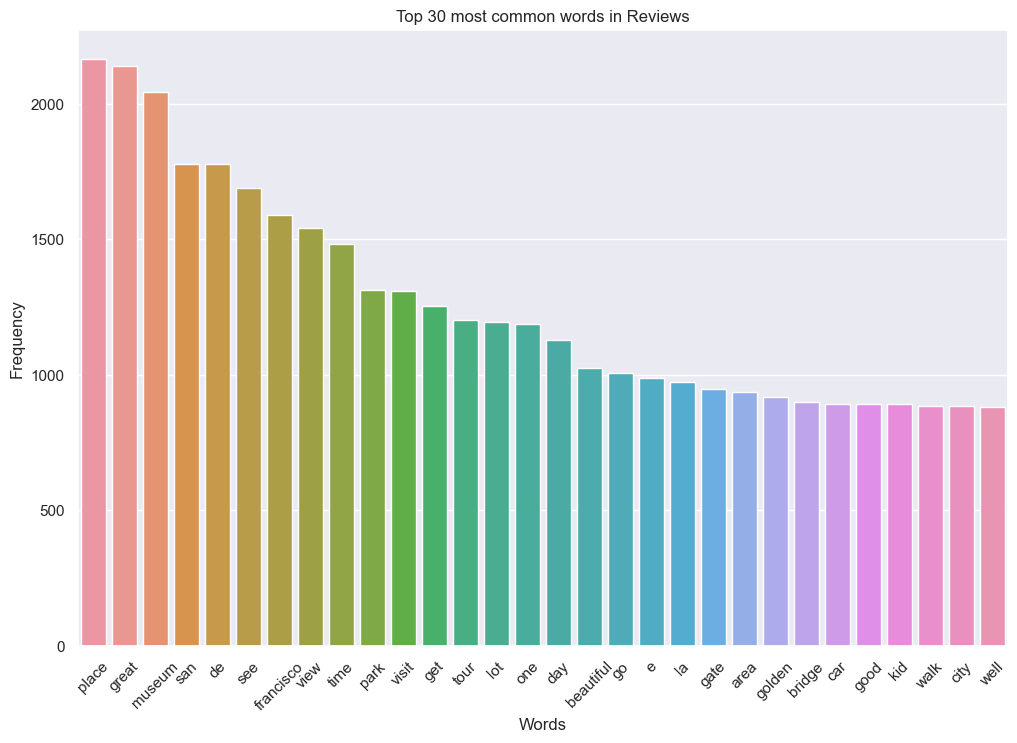

In [53]:
# Get the top 30 most common words
top_words = fq.most_common(30)

# Create a list of words and their frequencies
word = [word[0] for word in top_words]
freqs = [word[1] for word in top_words]

# Create a bar plot using Seaborn
sns.barplot(x=word, y=freqs)

# Set the x-axis label and rotate the labels for better readability
sns.set(rc={'figure.figsize':(12,8)})
plt.xticks(rotation=45)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 30 most common words in Reviews')
plt.show()

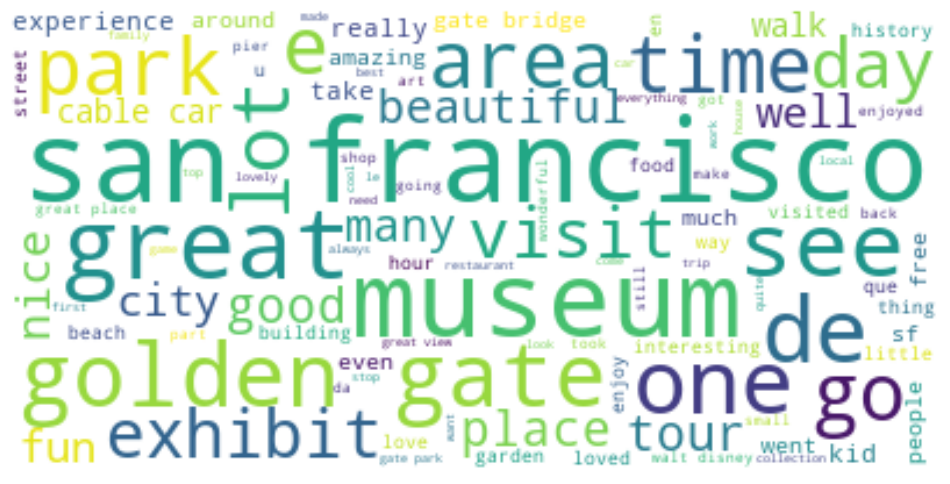

In [54]:
# Create wordcloud for every reviews
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(entire_review)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

The above two graphs show 'place', 'great', 'museum' and 'san francisco' are highly used in reviews.

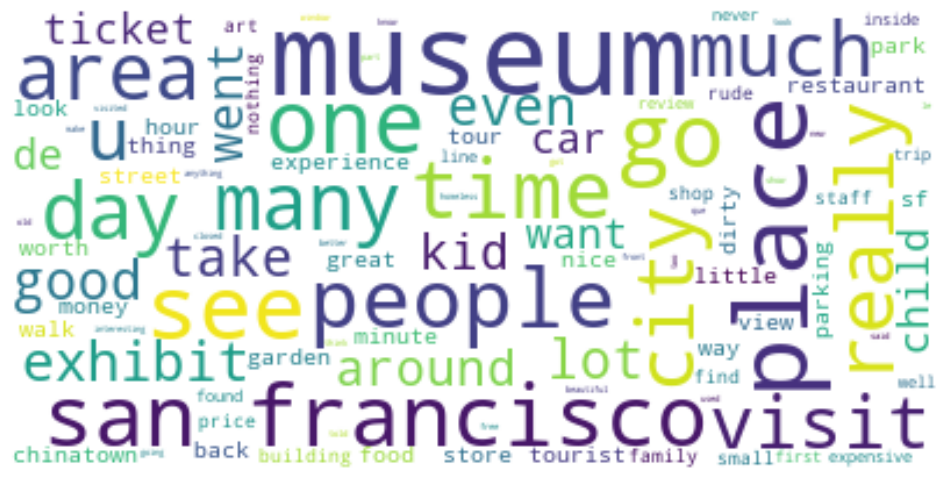

In [ ]:
# Create wordcloud for reviews which rating are 1 and 2
review_nlp_low_rate = ' '.join(review_nlp.loc[review_nlp['rating']<3]['lemmatized'])
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(review_nlp_low_rate)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

As for reviews have lower rating, many people mentioned museum, kid, child, visit, and people, it might reflect that some people were not satisfied with the visit, and the other explanation might be some places are not family-friendly enough for those who visited with younger children.

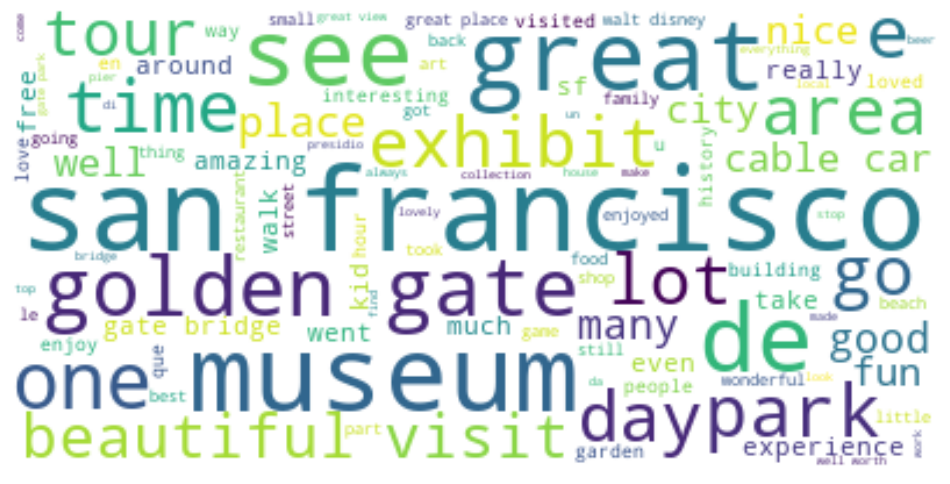

In [55]:
# Create wordcloud for reviews which rating are 4 and 5
review_nlp_low_rate = ' '.join(review_nlp.loc[review_nlp['rating']>3]['lemmatized'])
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(review_nlp_low_rate)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

As for high-rated reviews, still a lot of users mentioned museum, and some positive adjective are also shown in the plot, such as amazing, good, fun, beautiful, great.